## 55 - NDBC Latest Data Plotting

Watch video: [YouTube](https://www.youtube.com/watch?v=SPe8jYOURfc)

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from siphon.simplewebservice.ndbc import NDBC
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
df = NDBC.latest_observations()
df.head()

,station,latitude,longitude,wind_direction,wind_speed,wind_gust,wave_height,dominant_wave_period,average_wave_period,dominant_wave_direction,pressure,3hr_pressure_tendency,air_temperature,water_temperature,dewpoint,visibility,water_level_above_mean,time
0,13001,12.00,-23.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.6,NaN,NaN,NaN,2024-03-26 05:00:00+00:00
1,15009,0.00,-3.051,193.0,2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.2,30.7,NaN,NaN,NaN,2024-03-26 04:00:00+00:00
2,1801589,37.33,-122.840,290.0,7.1,8.1,2.0,14.0,NaN,NaN,1017.2,NaN,12.1,12.7,10.2,NaN,NaN,2024-03-26 04:30:00+00:00
3,22101,37.24,126.020,50.0,4.0,NaN,0.0,3.0,NaN,NaN,NaN,NaN,6.2,6.2,NaN,NaN,NaN,2024-03-26 05:00:00+00:00
4,22102,34.79,125.780,340.0,8.0,NaN,1.0,6.0,NaN,NaN,NaN,NaN,7.1,8.7,NaN,NaN,NaN,2024-03-26 05:00:00+00:00


In [3]:
df.dropna(subset=['water_temperature'], inplace=True)

In [5]:
proj = ccrs.LambertConformal(central_latitude=45, central_longitude=-100, standard_parallels=[30, 60])

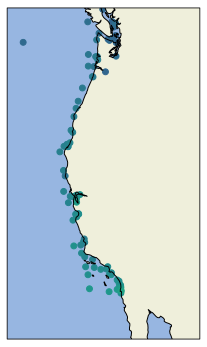

In [10]:
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(projection=proj)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), edgecolor='black')
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.set_extent([-125, -115, 30, 50], crs=ccrs.PlateCarree())
ax.scatter(df['longitude'], df['latitude'], c=df['water_temperature'], transform=ccrs.PlateCarree())
plt.show()